In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [10]:
raw_df=pd.read_csv (r'C:\Users\user\Desktop\Intubed/covid.csv',encoding='ISO-8859-1',parse_dates=[3,4])
raw_df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05,2020-02-05,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-06-04,2020-01-04,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-10-04,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-03-05,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,2020-07-04,2020-06-04,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,2020-05-14,2020-01-05,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,2020-05-31,2020-05-29,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [11]:
raw_df.drop(['id','patient_type','pregnancy','contact_other_covid','other_disease'],inplace=True,axis=1)

In [12]:
raw_df['days_prior_to_treatment'] = (raw_df['entry_date'] - raw_df['date_symptoms']).dt.days
raw_df['dead']='1'
raw_df.loc[raw_df['date_died']=='9999-99-99','dead']='0'
raw_df.drop(['entry_date','date_symptoms','date_died'],inplace=True,axis=1)
raw_df = raw_df.astype('int8')

In [13]:
raw_df=raw_df.loc[(raw_df['sex']<=2)&(raw_df['intubed']<=2)&(raw_df['pneumonia']<=2)&(raw_df['diabetes']<=2)&(raw_df['copd']<=2)&(raw_df['asthma']<=2)&(raw_df['inmsupr']<=2)&(raw_df['hypertension']<=2)&(raw_df['cardiovascular']<=2)&(raw_df['obesity']<=2)&(raw_df['renal_chronic']<=2)&(raw_df['tobacco']<=2)&(raw_df['covid_res']<=2)&(raw_df['dead']<=2)&(raw_df['icu']<=2)&(raw_df['days_prior_to_treatment']>=0),['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]

In [14]:
raw_df.loc[raw_df['sex']==2,'sex']=0
raw_df.loc[raw_df['inmsupr']==2,'inmsupr']=0
raw_df.loc[raw_df['pneumonia']==2,'pneumonia']=0
raw_df.loc[raw_df['diabetes']==2,'diabetes']=0
raw_df.loc[raw_df['asthma']==2,'asthma']=0
raw_df.loc[raw_df['copd']==2,'copd']=0
raw_df.loc[raw_df['hypertension']==2,'hypertension']=0
raw_df.loc[raw_df['cardiovascular']==2,'cardiovascular']=0
raw_df.loc[raw_df['renal_chronic']==2,'renal_chronic']=0
raw_df.loc[raw_df['obesity']==2,'obesity']=0
raw_df.loc[raw_df['tobacco']==2,'tobacco']=0
raw_df.loc[raw_df['intubed']==2,'intubed']=0
raw_df.loc[raw_df['icu']==2,'icu']=0
raw_df.loc[raw_df['covid_res']==2,'covid_res']=0

In [15]:
raw_df

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,days_prior_to_treatment,covid_res,intubed,icu,dead
3,0,30,0,1,0,0,0,0,0,0,0,0,86,1,0,0,0
4,1,60,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
5,0,47,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1
6,0,63,0,0,0,0,0,1,0,0,0,0,9,1,0,0,0
9,1,39,0,1,0,0,0,0,0,0,1,0,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499671,0,42,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0
499672,1,1,0,1,0,0,0,0,0,0,0,0,3,0,0,1,0
499677,1,55,0,1,0,0,0,0,0,0,1,0,57,0,0,0,0
499680,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score,classification_report

from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

In [17]:
raw_df=raw_df.loc[raw_df['covid_res']==1,['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]

In [18]:
X = raw_df.drop(['icu','covid_res','dead','intubed'], axis=1)
y = raw_df['intubed']

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0,stratify=y_res)

In [21]:
print('Lenght of training data:',len(X_train))
print('Lenght of testing data:',len(X_test))

Lenght of training data: 68220
Lenght of testing data: 29238


In [22]:
def reports():
    print("train Accuracy = {}".format(accuracy_score(y_train, train_model.predict(X_train))))
    print("test Accuracy = {}".format(accuracy_score(y_test, test_model)))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, test_model))
    print("Classification Report")
    print(classification_report(y_test, test_model))

In [23]:
acc=[]

In [24]:
train_model = RandomForestClassifier()
train_model.fit(X_train, y_train)
test_model = train_model.predict(X_test)

In [25]:
reports()

train Accuracy = 0.9695690413368514
test Accuracy = 0.8777276147479308
Confusion Matrix
[[12992  1627]
 [ 1948 12671]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14619
           1       0.89      0.87      0.88     14619

    accuracy                           0.88     29238
   macro avg       0.88      0.88      0.88     29238
weighted avg       0.88      0.88      0.88     29238



In [26]:
acc.append(0.8776)

In [27]:
train_model = KNeighborsClassifier(n_neighbors=20,weights='distance',p=1,metric='minkowski')
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [28]:
reports()

train Accuracy = 0.9695104075051305
test Accuracy = 0.8157534715096791
Confusion Matrix
[[11672  2947]
 [ 2440 12179]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     14619
           1       0.81      0.83      0.82     14619

    accuracy                           0.82     29238
   macro avg       0.82      0.82      0.82     29238
weighted avg       0.82      0.82      0.82     29238



In [29]:
acc.append(0.8151)

In [30]:
train_model = SVC()
train_model.fit(X_train, y_train)
test_model = train_model.predict(X_test)

In [31]:
reports()

train Accuracy = 0.6814717091761947
test Accuracy = 0.6751487789862508
Confusion Matrix
[[ 6386  8233]
 [ 1265 13354]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.44      0.57     14619
           1       0.62      0.91      0.74     14619

    accuracy                           0.68     29238
   macro avg       0.73      0.68      0.66     29238
weighted avg       0.73      0.68      0.66     29238



In [32]:
acc.append(0.6751)

In [33]:
train_model = XGBClassifier()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

[16:00:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
reports()

train Accuracy = 0.9245382585751979
test Accuracy = 0.9182912647923934
Confusion Matrix
[[14370   249]
 [ 2140 12479]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     14619
           1       0.98      0.85      0.91     14619

    accuracy                           0.92     29238
   macro avg       0.93      0.92      0.92     29238
weighted avg       0.93      0.92      0.92     29238



In [29]:
acc.append(0.9186)

In [35]:
from sklearn.linear_model import LogisticRegression
train_model = LogisticRegression()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [36]:
reports()

train Accuracy = 0.6591029023746702
test Accuracy = 0.6553457828852862
Confusion Matrix
[[ 5651  8968]
 [ 1109 13510]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.39      0.53     14619
           1       0.60      0.92      0.73     14619

    accuracy                           0.66     29238
   macro avg       0.72      0.66      0.63     29238
weighted avg       0.72      0.66      0.63     29238



In [37]:
acc.append(0.6553)

In [33]:
algo_name=['Random Forest','KNN','SVM','XGB', 'Logistic Regression']
acc=np.array(acc)

Text(0, 0.5, 'Accuracy')

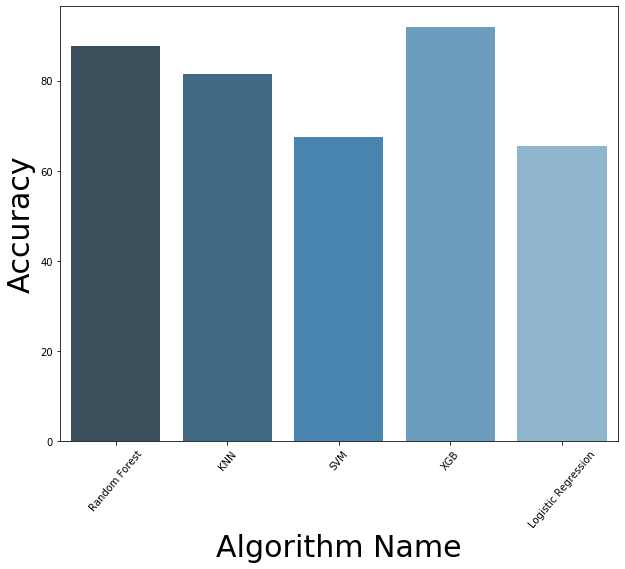

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=acc*100,x=algo_name,estimator=median,palette="Blues_d")
plt.xlabel('Algorithm Name',size=30)
plt.xticks(rotation=50)
plt.ylabel('Accuracy',size=30)